# Project Folder Structure




    |--> VisitWithUs-Tourism_version_1_1
        |--> Master
            |--> Data #STORING DATASET FILE
                |--> tourism.csv
                |--> test.csv  
                |--> train.csv    
            |--> Model_Dump_JOBLIB  #STOING PROGRAM GENERATED MODELS
                |--> best_threshold.txt
                |--> best_XGBoostingClassifier.joblib
                |--> XGBoostingClassifier.joblib
                |--> XGBoostingClassifier_ConfusionMatrix.png
                |--> RandomForestClassifier.joblib
                |--> RandomForestClassifier_ConfusionMatrix.png
                |--> GradientBoostingClassifier.joblib
                |--> GradientBoostingClassifier_ConfusionMatrix.png
                |--> DecisionTreeClassifier.joblib
                |--> DecisionTreeClassifier_ConfusionMatrix.png
                |--> BaggingClassifier.joblib
                |--> BaggingClassifier_ConfusionMatrix.png
                |--> AdaBoostingClassifier.joblib
                |--> AdaBoostingClassifier_ConfusionMatrix.png
            |--> Deployment # STORING STREAMLIT DEPLOYMENT FILE
              |--> app.py
              |--> requirement.txt
              |--> README.md
              |--> DockerFile
        |--> Visit-With-Us-Tourism-Prediction_v1_1.ipynb
        |--> DataRegistration.py
        |--> DataPrepration.py
        |--> BuildingModels.py
        |--> HostingInHuggingFace.py
        |--> main.py
        |--> .gitignore
        |--> .env
        |--> README.md
    |--> .github
        |--> workflows
            |--> pipeline.yml



# INSTALLING PACKAGES

* **Huggingface hub** - To interact with Hugging face programtically like creating space, dataset, models, streamlit deployment
* **python-dotenv**: For storing the credentials in .env file
* **datasets**: To create datasets and loading in Hugging face
* **pandas**: Data manipulations (dataframe)
* **scikit-learn:** To create Ensemmble models, train test split and metrics calculation
* **XGBOOST**: creating xbboosting classifier models
* **seaborn & matplotlib**: to create visuals
* **JOBLIB**: To create model dump
* **Streamlit**: To create front end creation

In [12]:
!pip install huggingface_hub
!pip install python-dotenv
!pip install datasets
!pip install pandas
!pip install scikit-learn
!pip install xgboost
!pip install seaborn
!pip install matplotlib
!pip install joblib
!pip install stramlit

ERROR: Could not find a version that satisfies the requirement stramlit (from versions: none)
ERROR: No matching distribution found for stramlit


# MOUNTING DRIVE

**In this Block Mounting the goolge drive and  reading the HuggingFace Token**

In [13]:
import os
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/'
base_path = os.getcwd()
print(f"Base Path {base_path}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
Base Path /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master


In [14]:
from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

# 1. DATA REGISTRATION



        |--> class DataRegistration
            |--> def __init__(self, base_path, hf_token=None)
                  * Contructor to assign the base_path and hugging face token
            |--> def HFCreateRepo(self)
                  * This Function will be creating dataset in the Hugging face
            |--> def UploadingSourceData(self)
                  * This function will upload the local tourism.csv file into Hugging face datasets
            |--> def ToRunPipeline(self)
                  * This function invoke the Creating dataset repo and uploading into dataset in hugging face

In [18]:
#@title Data Registration Class
#%%writefile DataRegistration.py
import os
import traceback
import inspect
from huggingface_hub import HfApi, create_repo,login,hf_hub_download

class DataRegistration:
  def __init__(self,base_path,hf_token=None):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    self.repoID = 'jpkarthikeyan/Tourism-visit-with-us-dataset'
    self.Subfolders = os.path.join(base_path,'Data')
    self.folder_Master = base_path
    self.folder_data = os.path.join(base_path,"Data")
    self.hf_token = hf_token

    os.makedirs(self.folder_data, exist_ok=True)
    print(f"self.Subfolders: {self.Subfolders}")
    print(f"self.folder_Master: {self.folder_Master}")
    print(f"folder_data: {self.folder_data}")
    print('-'*50)

  def HFCreateRepo(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      api = HfApi(token=self.hf_token)
      create_repo(repo_id=self.repoID,
                  private=False,
                  repo_type='dataset',
                  exist_ok=True)
      print(f"Repo {self.repoID} created")
      return True

    except Exception as ex:
      if hasattr(ex,'response') and ex.response.status_code == 409:
        print(f"Repo {self.repoID} already exists")
        return True
      else:
        print(f"Exception {ex}")
        traceback.print_exc()
        return False
    finally:
      print("-"*100)


  def UploadingSourceData(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      source_data_file = os.path.join(self.folder_data,'tourism.csv')
      print(f"Soruce Data File {source_data_file}")
      if not os.path.exists(source_data_file):
        raise FileNotFoundError(f"File {source_data_file} not found")
      api = HfApi()
      api.upload_file(
          path_or_fileobj = source_data_file,
          path_in_repo = 'Master/Data/tourism.csv',
          repo_id = self.repoID,
          repo_type='dataset',
          token=self.hf_token)
      print(f"Source data tourism.csv uploaded into {self.repoID}")
      return True

    except Exception as ex:
       print(f"Exception at {inspect.currentframe().f_code.co_name} Exception: {ex}")
       traceback.print_exc()
       return False
    finally:
      print("-"*100)

  def ToRunPipeline(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    if not self.HFCreateRepo():
      print('Exception in data registration HFCreateRepo')
      return False
    else:
      print('-'*50)
      if not self.UploadingSourceData():
        print('Exception in data registration UploadingSourceData')
        return False
      else:
        print('Data Registration Completed')
        print('-'*50)
        return True

In [19]:
dataRegObj = DataRegistration(base_path,hf_token)
if dataRegObj.ToRunPipeline():
  print('Success: Data Registration in hugging face completed')
else:
  print('Exception: Data Registration in Hugging Face failed')

Function Name __init__
self.Subfolders: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
self.folder_Master: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
folder_data: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
--------------------------------------------------
Function Name ToRunPipeline
Function Name HFCreateRepo
Repo jpkarthikeyan/Tourism-visit-with-us-dataset created
----------------------------------------------------------------------------------------------------
--------------------------------------------------
Function Name UploadingSourceData
Soruce Data File /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Ma

No files have been modified since last commit. Skipping to prevent empty commit.


Source data tourism.csv uploaded into jpkarthikeyan/Tourism-visit-with-us-dataset
----------------------------------------------------------------------------------------------------
Data Registration Completed
--------------------------------------------------
Success: Data Registration in hugging face completed


# 2. DATA PREPRATION

          |--> class DataPrepration
                |--> def __init__(self, base_bath, hf_token)
                    * Contructir for intializing the basepath and hf token
                |--> def LoadDatasetFromHF(self)
                    * Loading the source dataset from the huggingface and saving it in dataframe
                |--> def TrainTestSplit(self, df_dataset)
                    * split the source dataset into Train and Test dataframe
                |--> def DatasetCleaning(self,df_data)
                    * This fucntion will remove the duplicates, replace the missing/nan values
                |--> def UploadIntoHF(self,df,drive_path,file_name)
                    * convert the test and train dataframe into csv file and save it in local
                    * from local train and test saved csv file into hugging face dataset
                |--> def ToRunPipeline(self)
                    * This function will be invoke the above functions in sequences
                    * Loading the source file from Hugging face dataset and split into train and test and cleaning the dataset and saving it in local and uploading the train and test into huggingface dataset folder

In [22]:
#@title DataPrepration.py
#%%writefile DataPrepration.py
import os
import pandas as pd
import inspect
import traceback
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from huggingface_hub import HfApi, create_repo, login, hf_hub_download

class DataPrepration:
  def __init__(self,base_path, hf_token=None):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    self.repoID = 'jpkarthikeyan/Tourism-visit-with-us-dataset'
    self.Subfolders = os.path.join(base_path, 'Data')
    self.hf_token = hf_token
    print(f'self.repoID: {self.repoID}')
    print(f'self.Subfolders: {self.Subfolders}')
    print('-'*50)

  def LoadDatasetFromHF(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      df_dataset = pd.read_csv(hf_hub_download(
                                repo_id = self.repoID,
                                filename = 'Master/Data/tourism.csv',
                                repo_type='dataset'
                              ))

      print(f'Shape of the original dataset {df_dataset.shape}')

      if 'Unnamed: 0' in df_dataset.columns:
        df_dataset = df_dataset.drop(['Unnamed: 0'],axis=1)

      print(f"Dataset loaded from {self.repoID}/{self.Subfolders}")
      print(f"Shape of the Original Dataset: {df_dataset.shape}")
      return df_dataset
    except Exception as ex:
      print(f"Exception {ex}")
      traceback.print_exc()
      return None
    finally:
      print('-'*50)

  def TrainTestSplit(self,df_dataset):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      print(f"Value Count {df_dataset['ProdTaken'].value_counts()}")

      df_train,df_test = train_test_split(df_dataset,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=df_dataset['ProdTaken'],
                                          shuffle=True)

      print(f"Shape of the train dataset: {df_train.shape}")
      print(f"Shape of the test dataset: {df_test.shape}")

      return df_train, df_test
    except Exception as ex:
      print(f'Exception: {ex}')
      print(traceback.print_exc())
      return None, None
    finally:
      print('-'*50)

  def DatasetCleaning(self,df_data):
    try:
      print(f"Function Name {inspect.currentframe().f_code.co_name}")
      df_data['Gender'] = df_data['Gender'].replace('Fe Male', 'Female')

      df_data = df_data.drop_duplicates(subset=['CustomerID'], keep='first').reset_index(drop=True)

      for clmn in df_data.columns:
        if df_data[clmn].dtype in ['int64']:
          #print(f"{clmn} replacing the missing value with median")
          df_data[clmn] = df_data[clmn].fillna(df_data[clmn].median())
        else:
          #print(f"{clmn} replacing the missing value with mode")
          df_data[clmn] = df_data[clmn].fillna(df_data[clmn].mode()[0])

      df_data = df_data.drop(['CustomerID'], axis=1)

      numerical_column = df_data.select_dtypes(include=['int64'])

      for num_col in numerical_column:
        Q1 = df_data[num_col].quantile(0.25)
        Q3 = df_data[num_col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        #df_data[num_col] = df_data[num_col].clip(lower,upper)

      return df_data

    except Exception as ex:
      print(f"Exception {ex}")
      print(traceback.print_exc())
      return None
    finally:
      print('-'*50)

  def UploadIntoHF(self,df,drive_path,file_name):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      file_path = os.path.join(drive_path,file_name)
      df.to_csv(file_path,index=False)

      api = HfApi(token = self.hf_token)
      api.upload_file(path_or_fileobj =file_path,
                      path_in_repo= f"Master/Data/{file_name}",
                      repo_id = self.repoID,
                      repo_type='dataset',
                      token=self.hf_token)
      print(f"Source data {file_name} uploaded into {self.repoID}")
      return True
    except Exception as ex:
      print(f"Exception: {ex}")
      traceback.print_exc()
      return False
    finally:
      print('-'*50)

  def ToRunPipeline(self):
    try:
      print(f"Function Name {inspect.currentframe().f_code.co_name}")
      df_dataset = self.LoadDatasetFromHF()
      if df_dataset is None:
        return False
      else:
        df_train, df_test = self.TrainTestSplit(df_dataset)
        if df_train is None or df_test is None:
          return False
        else:
          df_train_cleaned = self.DatasetCleaning(df_train)
          df_test_cleaned = self.DatasetCleaning(df_test)
          if df_train is None or df_test is None:
            return False
          else:
            result_train = self.UploadIntoHF(df_train_cleaned,
                                             self.Subfolders,'train.csv')
            result_test = self.UploadIntoHF(df_test_cleaned,
                                            self.Subfolders,'test.csv')
            if not result_train or not result_test:
              print('Splitted dataset upload into HF Exception')
              return False
            else:
              print('Dataset downloaded from HF, Cleaned, Splitted into train and test dataset and uploaded back into HF dataset')
              return True
    except Exception as ex:
      print(f"Exception message in ToRunPipeline: {ex}")
      traceback.print_exc()
      return False
    finally:
      print('-'*50)

In [23]:
ObjDataPrep = DataPrepration(base_path,hf_token)
if ObjDataPrep.ToRunPipeline():
  print('Success: Data Prepration Completed')
else:
  print('Exception: Data prepration failed')

Function Name __init__
self.repoID: jpkarthikeyan/Tourism-visit-with-us-dataset
self.Subfolders: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
--------------------------------------------------
Function Name ToRunPipeline
Function Name LoadDatasetFromHF
Shape of the original dataset (4128, 21)
Dataset loaded from jpkarthikeyan/Tourism-visit-with-us-dataset//content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
Shape of the Original Dataset: (4128, 20)
--------------------------------------------------
Function Name TrainTestSplit
Value Count ProdTaken
0    3331
1     797
Name: count, dtype: int64
Shape of the train dataset: (3302, 20)
Shape of the test dataset: (826, 20)
--------------------------------------------------
Function Name DatasetCleaning
--------------------------------------------------
F

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


Source data train.csv uploaded into jpkarthikeyan/Tourism-visit-with-us-dataset
--------------------------------------------------
Function Name UploadIntoHF
Source data test.csv uploaded into jpkarthikeyan/Tourism-visit-with-us-dataset
--------------------------------------------------
Dataset downloaded from HF, Cleaned, Splitted into train and test dataset and uploaded back into HF dataset
--------------------------------------------------
Success: Data Prepration Completed


# 3.MODEL BUILDING WITH ENSEMBLE TECHNIQUES

          |--> class BuildingModels
                |--> def __init__(self,base_path, hf_token=None)
                      * Constructor for initializing the basepath and hugging face token
                |--> def Load_data_from_HF(self)
                      * this function will load the train and test dataset
                |--> def Preprocessing_dataset(self)
                      * preprocess the train and test dataset
                |--> def Building_Models(self)
                      * Models will be creating using ensemble techniques Adaboosting,gradient boosting, bagging, decision tree, random forest and XGBoosting
                |--> def Model_Evaluation(self)
                      * Evaluate the modeling based on the f1 score and pick the model with highest f1score
                |--> def Register_BestModel_HF(self)
                      * the Model with highest f1score will be register in the Huggingface Models
                |--> def ToRunPipeline(self)
                      * This function will invoke the above function

In [25]:
#@title BuildingModels.py
#%%writefile BuildingModels.py

import os
import joblib
import inspect
import traceback
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from datasets import load_dataset
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from huggingface_hub.utils import RepositoryNotFoundError
from huggingface_hub import HfApi, create_repo, login
from huggingface_hub import hf_hub_download
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, precision_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder


class BuildingModels:
  def __init__(self,base_path, hf_token=None):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    self.models = {}
    self.best_model = None
    self.best_score = 0
    self.best_f1_score =0.0
    self.best_model_threshold = 0.0
    self.best_model_name=None
    self.df_train = pd.DataFrame()
    self.df_test = pd.DataFrame()
    self.feature_train = pd.DataFrame()
    self.feature_test = pd.DataFrame()
    self.target_train = pd.Series()
    self.target_test = pd.Series()
    self.base_path = base_path
    self.Subfolders = os.path.join(base_path,'data')
    self.repo_id = 'jpkarthikeyan/Tourism_Prediction_Model'
    self.ds_repo_id = 'jpkarthikeyan/Tourism-visit-with-us-dataset'
    self.repo_type = 'model'
    self.hf_token = hf_token
    self.categorical_columns = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
    self.numerical_columns = ['Age','CityTier','DurationOfPitch','NumberOfPersonVisiting',
                              'NumberOfFollowups','PreferredPropertyStar',
                              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar',
                              'NumberOfChildrenVisiting','MonthlyIncome']

    self.pipeline_numerical = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    self.pipeline_onehot = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False))
    ])

  def Load_data_from_HF(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      print(f'Loading the train dataset from {self.ds_repo_id}')

      self.df_train = pd.read_csv(hf_hub_download(
                                repo_id = self.ds_repo_id,
                                filename = 'Master/Data/train.csv',repo_type='dataset'))
      self.df_test = pd.read_csv(hf_hub_download(
                                repo_id = self.ds_repo_id,
                                filename = 'Master/Data/test.csv',repo_type='dataset'))
      print(f"Shape of the train dataset: {self.df_train.shape}")
      print(f"Shape of the train dataset: {self.df_test.shape}")

      return True
    except Exception as ex:
      print(f"Exception: {ex}")
      traceback.print_exc()
      return False
    finally:
      print('-'*50)

  def Preprocessing_dataset(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:

      self.target_train = self.df_train['ProdTaken']
      self.feature_train = self.df_train.drop(['ProdTaken'],axis=1)

      self.target_test = self.df_test['ProdTaken']
      self.feature_test = self.df_test.drop(['ProdTaken'],axis=1)

      return True

    except Exception as ex:
      print(f"Exception: {ex}")
      traceback.print_exc()
      return False
    finally:
      print('-'*50)

  def Building_Models(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      preprocessor = ColumnTransformer(
          transformers=[
              ('num', self.pipeline_numerical,self.numerical_columns),
              ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore',
                        sparse_output=False),self.categorical_columns)])
      models_params = {
          'DecisionTreeClassifier':{
              'model': DecisionTreeClassifier(class_weight='balanced',random_state=42),
              'params': {'classifier__criterion':['gini','entropy'],
                         'classifier__splitter':['best','random'],
                        'classifier__max_depth':[1],
                         'classifier__min_samples_leaf':[1,2,4],
                         'classifier__min_samples_split':[2,5,10],
                         'classifier__max_features':['sqrt','log2',None]}
          },

          'RandomForestClassifier':{
              'model': RandomForestClassifier(class_weight='balanced',random_state=42),
              'params': { 'classifier__n_estimators':[25,50,75,100],
                          'classifier__criterion':['gini','entropy'],
                          'classifier__max_depth':[5,10,15],
                          'classifier__min_samples_split':[15,20,25],
                          'classifier__min_samples_leaf':[7,10,15],
                          'classifier__max_features':[0.3,0.5,0.6],
                          'classifier__oob_score':[True],
                          'classifier__bootstrap':[True]
                         }
          },

          'BaggingClassifier':{
              'model': BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',random_state=42)),
              'params':{  'classifier__n_estimators':[10,50,75,100],
                          'classifier__max_samples':[0.3,0.5,0.7,0.9],
                          'classifier__max_features':[0.3,0.5,0.7],
                          'classifier__oob_score':[True],
                          'classifier__estimator__criterion':['gini','entropy'],
                          'classifier__estimator__max_depth':[5,7,9],
                          'classifier__estimator__min_samples_split':[8,10,12],
                          'classifier__estimator__min_samples_leaf':[2,3,5]
                        }
          },

          'AdaBoostingClassifier':{
              'model': AdaBoostClassifier(random_state=42),
              'params':{  'classifier__n_estimators':[50,75,100],
                          'classifier__learning_rate':[0.01,0.05,0.1],
                          'classifier__algorithm':['SAMME','SAMME.R']

                      }
          },

          'GradientBoostingClassifier':{
              'model': GradientBoostingClassifier(random_state=42),
              'params':{
                          'classifier__n_estimators':[50,75,100,125],
                          'classifier__learning_rate':[0.01,0.5,0.1],
                          'classifier__criterion':['friedman_mse','squared_error'],
                          'classifier__max_features':['sqrt','log2'],
                          'classifier__min_samples_leaf':[1,2,4],
                          'classifier__subsample':[0.6,0.7,0.8],
                          'classifier__max_depth':[2,3,4,5]
                        }
          },

          'XGBoostingClassifier':{
              'model':XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
              'params':{'classifier__n_estimators':np.arange(50,100,10),
                        'classifier__max_depth': [3,5,7],
                        'classifier__learning_rate':[0.01,0.1,0.2],
                        'classifier__subsample':[0.6,0.8,1.0],
                        'classifier__colsample_bytree':[0.6,0.8,1.0],
                        'classifier__gamma':[0,1,2],
                        'classifier__reg_alpha':[0,1,2]

                        }
          }

        }

      cv_KFold = KFold(n_splits=3,random_state=42,shuffle=True)

      for model_name, mdl_params in models_params.items():
        print(f'Model {model_name} started')
        pipeline = Pipeline(steps=[
            ('preprocessor',preprocessor),
            ('classifier',mdl_params['model'])
        ])
        random_search = RandomizedSearchCV(pipeline,mdl_params['params'],
                                           n_iter=50,cv=cv_KFold,scoring='f1',
                                           random_state=42,n_jobs=-1,verbose=2)

        random_search.fit(self.feature_train,self.target_train)

        self.models[model_name] = {
            'model':random_search.best_estimator_,
            'best_score': random_search.best_score_,
            'best_params':random_search.best_params_
        }
        joblib.dump(random_search.best_estimator_,f'{self.base_path}/Model_Dump_JOBLIB/{model_name}.joblib')
        print(f'model:{random_search.best_estimator_}')
        print(f'best_score: {random_search.best_score_}')
        print(f'best_params: {random_search.best_params_}')
        print(f'Modle {model_name} completed')
        print('-'*50)

      return self.models
    except Exception as ex:
      print(f"Exception: {ex}")
    finally:
      print('-'*50)

  def Model_Evaluation(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    df_metrics = pd.DataFrame()
    try:
      for mdl_name, mdl_info in self.models.items():
        model = mdl_info['model']
        predict_proability = model.predict_proba(self.feature_test)
        print(f"Predict proability shape {mdl_name} {predict_proability.shape}")
        if predict_proability.shape[1] ==1:
          predict_proability = predict_proability.flatten()
        else:
          predict_proability = predict_proability[:,1]


        prc_precision,prc_recall, prc_threshold = precision_recall_curve(self.target_test,predict_proability)
        prc_f1score = 2*((prc_precision*prc_recall) / (prc_precision+prc_recall+1e-10))

        prc_threshold_idmx = np.argmax(prc_f1score)
        prc_best_threshold = prc_threshold[prc_threshold_idmx]
        print(f'best threshold: {prc_best_threshold}')

        predic_prob_threshold = (predict_proability >= prc_best_threshold).astype(int)
        #predic_prob_threshold = (predict_proability >= 0.5).astype(int)
        accuracy = accuracy_score(self.target_test,predic_prob_threshold)
        precision = precision_score(self.target_test,predic_prob_threshold)
        recall = recall_score(self.target_test,predic_prob_threshold)
        f1score = f1_score(self.target_test,predic_prob_threshold)
        class_report = classification_report(self.target_test,predic_prob_threshold)
        conf_matrix = confusion_matrix(self.target_test,predic_prob_threshold)

        lbl = ['TN', 'FP', 'FN', 'TP']
        cnf_lbl = ['\n{0:0.0f}'.format(cnf_val) for cnf_val in conf_matrix.flatten()]
        cn_percentage = ["\n{0:.2%}".format(item/conf_matrix.flatten().sum()) for item in conf_matrix.flatten()]

        confusion_label = np.asarray([["\n {0:0.0f}".format(item)+"\n{0:.2%}".format(item/conf_matrix.flatten().sum())]
                                for item in conf_matrix.flatten()]).reshape(2,2)

        cnf_label = np.asarray([f'{lbl1} {lbl2} {lbl3}' for lbl1, lbl2, lbl3 in zip(lbl, cnf_lbl,  cn_percentage)]).reshape(2,2)

        plt.figure(figsize = (3,3))
        sns.heatmap(conf_matrix, annot = cnf_label, cmap = 'Spectral', fmt='' )
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{mdl_name} confusion matrix')
        plt.tight_layout()
        plt.show()
        plot_path = os.path.join(self.base_path,'Model_Dump_JOBLIB',f'{mdl_name}_ConfusionMatrix.png')
        plt.savefig(plot_path)
        plt.close()


        df_metrics = pd.concat([df_metrics,pd.DataFrame({'model':[mdl_name],'accuracy':[accuracy],
                                            'precision':[precision], 'recall':[recall],
                                            'f1_score':[f1score]})],ignore_index=True)

        if f1score > self.best_f1_score:
          self.best_f1_score = f1score
          self.best_model_threshold = prc_best_threshold
          self.best_model_name = mdl_name

      best_model = self.models[self.best_model_name]['model']
      if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature':self.feature_train.columns,
            'importance': best_model.feature_importances_
        }).sort_values('importance',ascending=False)
        print('Feature Importance:\n',feature_importance)


      return df_metrics

    except Exception as ex:
      print(f"Exception: {ex}")
    finally:
      print('-'*50)

  def Register_BestModel_HF(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      best_model = self.models[self.best_model_name]['model']
      joblib.dump(best_model,f'{self.base_path}/Model_Dump_JOBLIB/BestModel_{self.best_model_name}.joblib')


      api = HfApi()
      try:
        api.repo_info(repo_id=self.repo_id,repo_type=self.repo_type)
      except RepositoryNotFoundError:
        api.create_repo(repo_id=self.repo_id, repo_type=self.repo_type,private=False)


      print("Uploading the best model into Hugging face")
      api.upload_file(path_or_fileobj = f'{self.base_path}/Model_Dump_JOBLIB/BestModel_{self.best_model_name}.joblib',
                      path_in_repo = f"Model_Dump_JOBLIB/BestModel_{self.best_model_name}.joblib",
                      repo_id=self.repo_id, repo_type=self.repo_type
                      )


      print("Uploading the best threshold text file to HF")
      with open(f'{self.base_path}/Model_Dump_JOBLIB/best_threshold.txt','w') as f:
        f.write(str(self.best_model_threshold))
      api.upload_file(path_or_fileobj = f"{self.base_path}/Model_Dump_JOBLIB/best_threshold.txt",
                      path_in_repo = f"Model_Dump_JOBLIB/best_threshold.txt",
                      repo_id=self.repo_id, repo_type=self.repo_type
                      )

      return True


    except Exception as ex:
      print(f"Exception: {ex}")
      traceback.print_exc()
      return False
    finally:
      print('-'*50)

  def ToRunPipeline(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      if not self.Load_data_from_HF():
        return False
      else:
        if not self.Preprocessing_dataset():
          return False
        else:
          Build_Model = self.Building_Models()
          print(Build_Model)
          if Build_Model:
            df_Metrics = self.Model_Evaluation()
            print(df_Metrics)
            if not df_Metrics.empty:
              if self.Register_BestModel_HF():
                return True
              else:
                return False
            else:
              return False
          else:
            return False
    except Exception as ex:
      print(f'Exception occured {ex}')
    finally:
      print('-'*50)


Function Name __init__
Function Name ToRunPipeline
Function Name Load_data_from_HF
Loading the train dataset from jpkarthikeyan/Tourism-visit-with-us-dataset


train.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Shape of the train dataset: (3302, 19)
Shape of the train dataset: (826, 19)
--------------------------------------------------
Function Name Preprocessing_dataset
--------------------------------------------------
Function Name Building_Models
Model DecisionTreeClassifier started
Fitting 3 folds for each of 50 candidates, totalling 150 fits
model:Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CityTier',
                                                   'DurationOfPitch',
                                                   'NumberOfPersonVisiting'

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 54.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in 

model:Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CityTier',
                                                   'DurationOfPitch',
                                                   'NumberOfPersonVisiting',
                                                   'NumberOfFollowups',
                                                   'PreferredPropertyStar',
                                                   'NumberOfTrips', 'Passport',
                                                   'PitchSatisfactionScore',
                                     

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:21:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


model:Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'CityTier',
                                                   'DurationOfPitch',
                                                   'NumberOfPersonVisiting',
                                                   'NumberOfFollowups',
                                                   'PreferredPropertyStar',
                                                   'NumberOfTrips', 'Passport',
                                                   'PitchSatisfactionScore',
                                     

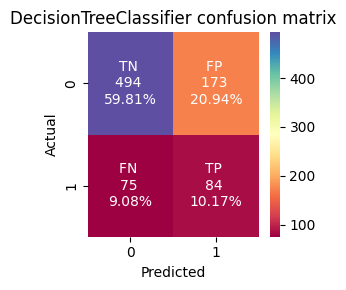

Predict proability shape RandomForestClassifier (826, 2)
best threshold: 0.43784253782494276


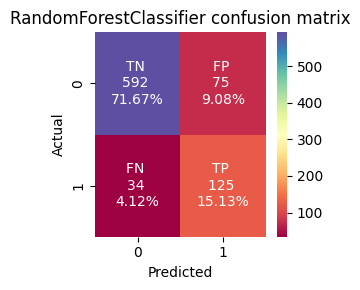

Predict proability shape BaggingClassifier (826, 2)
best threshold: 0.39216235094397484


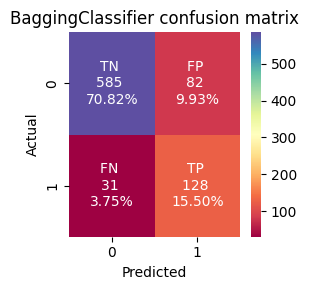

Predict proability shape AdaBoostingClassifier (826, 2)
best threshold: 0.3196189229737486


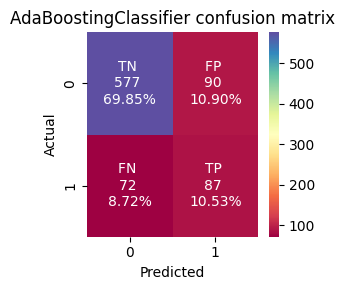

Predict proability shape GradientBoostingClassifier (826, 2)
best threshold: 0.24867338889476726


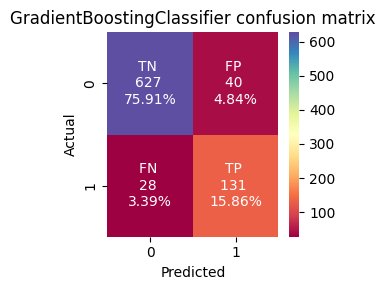

Predict proability shape XGBoostingClassifier (826, 2)
best threshold: 0.3477764427661896


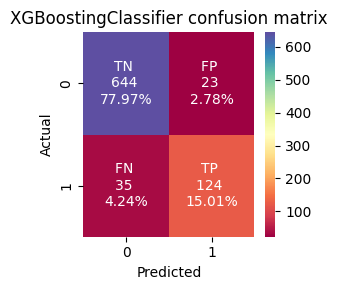

--------------------------------------------------
                        model  accuracy  precision    recall  f1_score
0      DecisionTreeClassifier  0.699758   0.326848  0.528302  0.403846
1      RandomForestClassifier  0.868039   0.625000  0.786164  0.696379
2           BaggingClassifier  0.863196   0.609524  0.805031  0.693767
3       AdaBoostingClassifier  0.803874   0.491525  0.547170  0.517857
4  GradientBoostingClassifier  0.917676   0.766082  0.823899  0.793939
5        XGBoostingClassifier  0.929782   0.843537  0.779874  0.810458
Function Name Register_BestModel_HF
Uploading the best model into Hugging face
Uploading the best threshold text file to HF


No files have been modified since last commit. Skipping to prevent empty commit.


--------------------------------------------------
--------------------------------------------------
Success: BuildingModels.py Completed


In [26]:
ObjModelBuild = BuildingModels(base_path,hf_token)
if ObjModelBuild.ToRunPipeline():
  print('Success: BuildingModels.py Completed')
else:
  print('Exception: BuildingModels.py failed')

# 4. Hosting In Hugging Face Streamlit(Front End Implementation)

**Streamlit deployment requirement.txt file**

In [27]:
%%writefile Deployment/requirements.txt
pandas
numpy
scikit-learn
joblib
streamlit
huggingface_hub
xgboost
dill

Overwriting Deployment/requirements.txt


**Streamlit deployment Readme file**

In [28]:
%%writefile Deployment/README.md
---
title: Visit With Us - Tourism package prediction
emoji: 🚩
colorFrom: blue
colorTo: green
sdk: docker
sdk_version: 3.9
app_file: app.py
app_type: streamlit
pinned: false
license: mit
---
The streamlit app predicts the customer will purchace the tourism package

Overwriting Deployment/README.md


**Streamlit deployment Docker file**

In [29]:
%%writefile Deployment/Dockerfile
# Use a minimal base image with Python 3.9 installed
FROM python:3.12-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip install --no-cache-dir -r requirements.txt
RUN mkdir -p /tmp/hf_cache && chmod -R 777 /tmp/hf_cache
ENV HF_HOME=/tmp/hf_cache
ENV HUGGINGFACE_HUB_CACHE=/tmp/hf_cache
ENV PYTHONUNBUFFERED=1


EXPOSE 7860


# Define the command to run the Streamlit app on port "7860" and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=7860", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

Overwriting Deployment/Dockerfile


            |--> app.py
                |--> class PredictorTourism
                    |-->  def __init__(self)
                          * Constructor for prediction tourism
                    |-->  def Load_Model(self):
                          * This function will load the best model and threshold file from hugging face
                    |-->  def Predict(self, data):
                          * based on the userinput the model will be predict
                |--> front end form creation to get user input
                      * Front end form creation to get the user input
                |--> Invoke Prediction and displaying the prediction output
                      * Function to invoke the funtion to get the user input and process the prediction

In [30]:
%%writefile Deployment/app.py
import streamlit as st
import pandas as pd
import joblib
import os
import dill
import logging
from huggingface_hub import login,hf_hub_download
from xgboost import XGBClassifier

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
cache_dir = "/tmp/hf_cache"
os.environ["HF_HOME"] = cache_dir
os.environ["HUGGINGFACE_HUB_CACHE"] = cache_dir

try:
  hf_token = os.getenv("HUGGINGFACE_TOKEN")

  if hf_token:
    login(token=hf_token)
    logger.info("Successfully logged in to Hugging Face")
  else:
    logger.error("Hugging face token not found")
    st.error("Huggingface token not found")
except Exception as ex:
  logger.error(f"Failed to login to Hugging face: {ex} ")
  st.write(f"Failed to login to Hugging face: {ex} ")

try:
  os.makedirs(cache_dir, exist_ok=True)
  logger.info(f"Created cache directory {cache_dir}")
except Exception as ex:
  logger.error(f"Failed to create cache directory {cache_dir}: {ex}")
  st.error(f"Failed to create cache directory {cache_dir}: {ex}")


st.title("Visit with Us: Tourism Package Prediction")
st.write("Enter the Customer details to predict the likehood of purchasing the tourism packages")


if 'predictor' not in st.session_state:
  st.session_state.predictor = None
  st.session_state.model_loaded = False

class PredictorTourism:

  def __init__(self):
    self.Subfolders = 'Master'
    self.repoID = 'jpkarthikeyan/Tourism_Prediction_Model'
    self.model = None
    self.best_threshold = 0.0


  def Load_Model(self):
    try:
      logger.info("Loading best model")
      model_path = hf_hub_download(
          repo_id = self.repoID,filename = f'Model_Dump_JOBLIB/BestModel_XGBoostingClassifier.joblib',
          repo_type = 'model')
      threshold_path = hf_hub_download(
          repo_id = self.repoID, filename=f'Model_Dump_JOBLIB/best_threshold.txt',
          repo_type='model')

      logger.info(f"Model path: {model_path}")
      logger.info(f"Threshold path:  {threshold_path}")

      #self.model = joblib.load(model_path)
      with open(model_path, 'rb') as f:
        self.model = joblib.load(f)
      with open(threshold_path,'r') as f:
        self.best_threshold = float(f.read())
      st.success("Model and threshold loaded successfully")
      return True

    except Exception as ex:
      st.error(f'Exception: {ex}')
      logging.error(f'Exception {ex}')
      return False


  def Predict(self, data):
    try:
      logger.info(f"Input Data: {data}")
      df= pd.DataFrame([data])
      logger.info(f"Data shape: {df.shape}")
      logger.info(f"Dataframe columns: {df.columns.tolist()}")
      prob = self.model.predict_proba(df)[:,1]
      prediction = int(prob >= self.best_threshold)
      return prediction

    except Exception as ex:
      logger.error(f"Exception in predict: {ex}", exc_info=True)
      st.error(f"Exception Prediction: {ex}")
      return ex


if not st.session_state.model_loaded:
  st.session_state.predictor = PredictorTourism()
  st.session_state.model_loaded = st.session_state.predictor.Load_Model()

with st.form("customer_form"):
  st.header("Customer Details")
  col1, col2,col3 = st.columns(3)

  with col1:

    age = st.number_input("Age", min_value=18, max_value=100, value=41)
    gender = st.selectbox('Gender',['Male','Female'])
    MaritalStatus = st.selectbox('MaritalStatus',['Married','Unmarried','Single','Divorced'])
    Occupation = st.selectbox('Occupation',['Free Lancer','Salaried','Small Business','Large Business'])
    Designation = st.selectbox('Designation',['AVP','Manager','Executive','Senior Manager','VP'])
    MonthlyIncome = st.number_input('MonthlyIncome',min_value=0, max_value=1000000,value=20999)

  with col2:

    typeofcontact = st.selectbox("TypeofContact",['Self Enquiry','Company Invited'])
    citytier = st.selectbox('citytier',[1,2,3], index=2)
    DurationOfPitch = st.number_input('DurationOfPitch', min_value=1, max_value=60, value=6)
    ProductPitched = st.selectbox('ProductPitched',['Deluxe','Basic','Standard','Super Deluxe','King'])
    PreferredPropertyStar = st.selectbox("'PreferredPropertyStar",[3,2,1])
    NumberOfTrips = st.number_input('NumberOfTrips',min_value=0, max_value=30, value=1)


  with col3:
    NumberOfPersonVisiting = st.number_input('NumberOfPersonVisiting',min_value=1,max_value=10,value=3)
    NumberOfFollowups = st.number_input('NumberOfFollowups',min_value=0,max_value=10, value=3)
    NumberOfChildrenVisiting= st.number_input('NumberOfChildrenVisiting',min_value=0,max_value=5,value=0)
    Passport= st.selectbox('Passport',['Yes','No'],format_func=lambda x:"Yes" if x=="Yes" else "No")
    Owncar= st.selectbox('OwnCar',['Yes','No'],format_func=lambda x:"Yes" if x=="Yes" else "No")
    PitchSatisfactionScore= st.number_input('PitchSatisfactionScore',min_value=1,max_value=5,value=3)


  submitted = st.form_submit_button("Predict")

if submitted:
  input_data = {
      'Age':age,
      'TypeofContact':typeofcontact,
      'CityTier':citytier,
      'DurationOfPitch':DurationOfPitch,
      'Occupation':Occupation,
      'Gender':gender,
      'NumberOfPersonVisiting':NumberOfPersonVisiting,
      'NumberOfFollowups':NumberOfFollowups,
      'ProductPitched':ProductPitched,
      'PreferredPropertyStar':PreferredPropertyStar,
      'MaritalStatus':MaritalStatus,
      'NumberOfTrips':NumberOfTrips,
      'Passport':1 if Passport =="Yes" else 0,
      'OwnCar':1 if Owncar =="Yes" else 0,
      'PitchSatisfactionScore':PitchSatisfactionScore,
      'NumberOfChildrenVisiting':NumberOfChildrenVisiting,
      'Designation':Designation,
      'MonthlyIncome':MonthlyIncome

  }


  if st.session_state.predictor:
    result = st.session_state.predictor.Predict(input_data)

    if result is not None:
      st.subheader(f"Prediction Result is {result}")
      st.write(f"Likely to purchase" if result ==1 else "Unlikely to purchase")
    else:
      st.write(result)
      st.error("Error in prediction")
  else:
    st.error("Models are not loaded, please ensure the model and threshold are available on Hugging face")



Overwriting Deployment/app.py


          |--> class HostingInHuggingFace
              |--> def __init__(self,base_path,hf_token=None):
                  * Constructor for intialize the base path and hf token
              |--> def CreatingSpaceInHF(self):
                  * Fucntion to create Hugging face space to upload the file deployment file
              |--> def UploadDeploymentFile(self):
                  * Uploading the deployment file into hugging face space
              |--> def ToRunPipeline(self):
                  * Pipeline function to invoke the the above in sequence

In [32]:
#@title HostingInHuggingFace.py
#%%writefile HostingInHuggingFace.py
import os
import inspect
import traceback
from huggingface_hub import HfApi, create_repo, login,hf_hub_download
from huggingface_hub.utils import RepositoryNotFoundError

class HostingInHuggingFace:
  def __init__(self,base_path,hf_token=None):
    self.base_path = base_path
    self.hf_token = hf_token
    self.repo_id = 'jpkarthikeyan/Tourism-Prediction-Model-Space'

  def CreatingSpaceInHF(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    api = HfApi()
    try:
      print(f"Checking for {self.repo_id} is correct or not")
      api.repo_info(repo_id = self.repo_id,
                    repo_type='space',
                    token = self.hf_token)
      print(f"Space {self.repo_id} already exists")
    except RepositoryNotFoundError:
      create_repo(repo_id=self.repo_id,
                  repo_type='space',
                  space_sdk='docker',
                  private=False,
                  token=self.hf_token)
      print(f"Space created in {self.repo_id}")
    except Exception as ex:
      print(f"Exception in creating space {ex}")
      traceback.print_exc()
    finally:
      print('-'*50)


  def UploadDeploymentFile(self):
    print(f"Function Name {inspect.currentframe().f_code.co_name}")
    try:
      api = HfApi(token=self.hf_token)
      directory_to_upload = os.path.join(self.base_path,'Deployment')
      print(f"Directory to upload {directory_to_upload} into HF Space {self.repo_id}")
      api.upload_folder(repo_id=self.repo_id, folder_path=directory_to_upload,
                        repo_type='space')
      print(f"Successfully upload {directory_to_upload} into {self.repo_id}")
      return True
    except Exception as ex:
      print(f"Exception occured {ex}")
      print(traceback.print_exc())
      return False
    finally:
      print('-'*50)

  def ToRunPipeline(self):
    try:
      self.CreatingSpaceInHF()
      if self.UploadDeploymentFile():
        print('Deployment pipeline completed')
        return True
      else:
        print('Deployment pipeline failed')
        return False
    except Exception as ex:
      print(f"Exception occured {ex}")
      print(traceback.print_exc())
      return False
    finally:
      print('-'*50)


In [33]:
ObjHostingInHF = HostingInHuggingFace(base_path,hf_token)
if ObjHostingInHF.ToRunPipeline():
  print('Success: HostingInHuggingFace.py Completed')
else:
  print('Exception: HostingInHuggingFace.py failed')

Function Name CreatingSpaceInHF
Checking for jpkarthikeyan/Tourism-Prediction-Model-Space is correct or not
Space jpkarthikeyan/Tourism-Prediction-Model-Space already exists
--------------------------------------------------
Function Name UploadDeploymentFile
Directory to upload /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Deployment into HF Space jpkarthikeyan/Tourism-Prediction-Model-Space
Successfully upload /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Deployment into jpkarthikeyan/Tourism-Prediction-Model-Space
--------------------------------------------------
Deployment pipeline completed
--------------------------------------------------
Success: HostingInHuggingFace.py Completed


# Main Function

In [34]:
%cd '/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/'

/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master


In [35]:
os.getcwd()

'/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master'

In [40]:
%%writefile main.py
import os
import sys
import argparse
from dotenv import load_dotenv

try:
  base_path = os.path.abspath((os.path.dirname(__file__)))
except:
  base_path = os.path.join(os.getcwd(),'Master')
  print(base_path)

print(f'Base path {base_path}')

sys.path.append(base_path)

data_dir = os.path.join(base_path, 'Data')
model_dir = os.path.join(base_path,'Model_Dump_JOBLIB')
#job = ['register','prepare']
#job = 'prepare'

parser = argparse.ArgumentParser(description='Run a specific job in the pipeline')
parser.add_argument('--job', type=str, required=True,
                    choices=['register','prepare','modelbuilding','deploy'],
                    help='Job To execute register,prepare,modelbuilding,deploy')
args = parser.parse_args()

os.makedirs(data_dir, exist_ok=True)
os.makedirs(model_dir, exist_ok=True)
load_dotenv(dotenv_path=os.path.join(base_path,'.env'))
hf_token = os.getenv('HF_TOKEN')
if not hf_token:
  raise ValueError("HF_TOKEN not found in .env file")

if args.job == 'register':
  from DataRegistration import DataRegistration
  data_reg = DataRegistration(base_path, hf_token)
  if not data_reg.ToRunPipeline():
    sys.exit(1)
elif args.job == 'prepare':
  from DataPrepration import DataPrepration
  obj_data_prep = DataPrepration(base_path,hf_token)
  if not obj_data_prep.ToRunPipeline():
    sys.exit(1)
elif args.job == 'modelbuilding':
  from BuildingModels import BuildingModels
  ObjBuildModel = BuildingModels(base_path,hf_token)
  if not ObjBuildModel.ToRunPipeline():
    sys.exit(1)
elif args.job == 'deploy':
  from HostingInHuggingFace import HostingInHuggingFace
  Obj_deploy = HostingInHuggingFace(base_path,hf_token)
  if not Obj_deploy.ToRunPipeline():
    sys.exit(1)

Overwriting main.py


In [41]:
#@title Invoking the DataRedistration.py from main.py | !python main.py --job register
!python main.py --job register

Base path /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
Function Name __init__
self.Subfolders: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
self.folder_Master: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
folder_data: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
--------------------------------------------------
Function Name ToRunPipeline
Function Name HFCreateRepo
Repo jpkarthikeyan/Tourism-visit-with-us-dataset created
----------------------------------------------------------------------------------------------------
--------------------------------------------------
Function Name UploadingSourceData
So

In [42]:
#@title Invoking the DataPrepration.py from main.py | !python main.py --job prepare
!python main.py --job prepare

Base path /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
Function Name __init__
self.repoID: jpkarthikeyan/Tourism-visit-with-us-dataset
self.Subfolders: /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
--------------------------------------------------
Function Name ToRunPipeline
Function Name LoadDatasetFromHF
Shape of the original dataset (4128, 21)
Dataset loaded from jpkarthikeyan/Tourism-visit-with-us-dataset//content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master/Data
Shape of the Original Dataset: (4128, 20)
--------------------------------------------------
Function Name TrainTestSplit
Value Count ProdTaken
0    3331
1     797
Name: count, dtype: int64
Shape of the train dataset: (3302, 20)
Shape of the test dat

In [43]:
#@title Invoking the BuildingModels.py from main.py | !python main.py --job modelbuilding
!python main.py --job modelbuilding

Base path /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/Master
Function Name __init__
Function Name ToRunPipeline
Function Name Load_data_from_HF
Loading the train dataset from jpkarthikeyan/Tourism-visit-with-us-dataset
Shape of the train dataset: (3302, 19)
Shape of the train dataset: (826, 19)
--------------------------------------------------
Function Name Preprocessing_dataset
--------------------------------------------------
Function Name Building_Models
Model DecisionTreeClassifier started
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END classifier__criterion=entropy, classifier__max_depth=1, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier__min_samples_split=10, classifier__splitter=random; total time=   0.1s
[CV] END classifier__criterion=entropy, classifier__max_depth=1, classifier__max_features=log2, classifier__min_samples_leaf=1, classifier_

# pipeline.yml

In [44]:
%cd '/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1/'

/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/10_Advance_Machine_Learning_And_MLOps/Final_Project/VisitWithUs-Tourism_version_1_1


In [45]:
!ls

Master


            |--> pipeline.yml
                |--> Initializing
                |--> jobs
                      |--> register-dataset
                            |--> Set up job
                            |--> Checkout Repository
                            |-->Setup python
                            |--> Install Dependencies
                            |--> List Directory Contents(debug)
                            |--> CCopy tourism.csv from local
                            |--> Run DataRegistration
                            |-->Checkpipeline status
                            |--> Verfiy upload
                            |--> post setup python
                            |--> Post Checkout Repository
                            |--> Complete Job
                      |--> data-prepration
                            |--> Set up job
                            |--> Checkout Repository
                            |--> Set up Python
                            |--> Install Dependencies
                            |--> Copy tourism.csv
                            |--> Run DataPrepration.py
                            |--> Check Pipeline status
                            |--> Verify Upload
                            |--> Post Set up Python
                            |--> Post Checkout Repository
                            |--> Complete Job
                      |--> model-building
                            |--> Set up job
                            |--> Checkout Repository
                            |--> Set up Python
                            |--> Install Dependencies
                            |--> Create Model Dump Directory
                            |--> Run Model BuildingModels.py
                            |--> Check pipeline status
                            |--> Verify Execution
                            |--> List Generated Files
                            |--> Commit and Push Generated Files
                            |--> Pull Remote Changes
                            |--> Push Generated Files
                            |--> Post Setup Python
                            |--> Post Checkout Repository
                            |--> complete job
                      |--> deploy-to-success
                            |--> Set up job
                            |--> Checkput Repository
                            |--> Setup python
                            |--> INSTALL DEPENDENCIES
                            |--> Set up Docker Buildx
                            |--> Debug Authentication
                            |--> Login to Github Container Registryy
                            |-->Build and push docker image to Github Container Registry
                            |--> Deploy to Hugging Faces spaces
                            |--> Checkout Deployment stauts
                            |--> Post set up Docker Buildx
                            |--> Post Setup Python
                            |--> Post Checkout Repository
                            |--> Complete Job

In [46]:
%%writefile .github/workflows/pipeline.yml
name: Visit With Us Toursim Prediction Pipeline

on:
  push:
    branches:
      - main # Automatically triggers on push to the main branch
    paths:
      - 'Master/Data/tourism.csv'
      - 'Master/DataRegistration.py'
      - 'Master/DataPrepration.py'
      - 'Master/BuildingModels.py'
      - 'Master/main.py'
      - 'Master/HostingInHuggingFace.py'
      - '.github/workflows/pipeline.yml'
      - 'Master/Deployment/**'
  workflow_dispatch:

jobs:
  register-dataset:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: Setup python
        uses: actions/setup-python@v5
        with:
          python-version: '3.12'

      - name: Install Dependencies
        run: |
          python -m pip install --upgrade pip
          pip install huggingface_hub python-dotenv

      - name: List Directory Contents(Debug)
        run: |
          ls -la Master/Data/ || echo "Master/Data/ directory not found"
          ls -la . || echo "Root Directory contents"

      - name: Copy tourism.csv(if using a local file)
        run: |
          mkdir -p Master/Data
          if [ -f tourism.csv ]; then
            cp tourism.csv Master/Data/
            echo "Copied tourism.csv from root to Master/Data/"
          else
            echo "tourism.csv not found in root attemtpting to download from hugging face"

            python -c "from huggingface_hub import hf_hub_download;hf_hub_download(repo_id='jpkarthikeyan/Tourism-visit-with-us-dataset',filename='tourism.csv',local_dir='Master/Data/')"
            fi

      - name: Run Data Registration
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          cd Master
          python main.py --job register
        continue-on-error: false

      - name: Check Pipeline status
        if: failure()
        run: |
          echo "Data Registration pipeline failed. please check logs"
          exit 1

      - name: Verify Upload
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          echo "Verifying Upload on Hugging Face"
          python -c "import os;from huggingface_hub import HfApi;api= HfApi(token=os.getenv('HF_TOKEN'));print(api.repo_info(repo_id='jpkarthikeyan/Tourism-visit-with-us-dataset',repo_type='dataset'))"

  data-prepration:
    runs-on: ubuntu-latest
    needs: register-dataset
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.12'

      - name: Install Dependencies
        run: |
          python -m pip install --upgrade pip
          pip install pandas numpy huggingface_hub python-dotenv datasets scikit-learn

      - name: Copying tourism.csv
        run: |
          mkdir -p Master/Data
          cp tourism.csv Master/Data || echo "tourism.csv not found in root"

      - name: Run DataPrepration.py
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          cd Master
          python main.py --job prepare
        continue-on-error: false

      - name: Check Pipeline Status
        if: failure()
        run: |
          echo "Data Prepration pipeline failed. please check the log"
          exit 1
      - name: Verify Upload
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          echo "Verifying Upload on Hugging Face"
          python -c "import os; from huggingface_hub import HfApi; token = os.getenv('HF_TOKEN');print(HfApi(token=token).repo_info(repo_id='jpkarthikeyan/Tourism-visit-with-us-dataset', repo_type='dataset'))"

  model-building:
    runs-on: ubuntu-latest
    needs: data-prepration
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: Set up Python
        uses: actions/setup-python@v5
        with:
          python-version: '3.12'

      - name: Install Dependencies
        run: |
          python -m pip install --upgrade pip
          pip install huggingface_hub python-dotenv pandas numpy scikit-learn joblib xgboost seaborn matplotlib datasets

      - name: Create Model Dump Directory
        run: |
          mkdir -p Master/Model_Dump_JOBLIB

      - name: Run Model Building
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          cd Master
          python main.py --job modelbuilding
        continue-on-error: false

      - name: Check pipeline status
        if: failure()
        run: |
          echo "Exception in Build Models. please check logs"
          exit 1

      - name: Verify Execution
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          echo "Verifying the execution"
          python -c "import os; from huggingface_hub import HfApi;token=os.getenv('HF_TOKEN');print(HfApi(token=token).repo_info(repo_id='jpkarthikeyan/Tourism_Prediction_Model',repo_type='model')) "

      - name: List Generated Files
        run: |
          ls -l Master/Model_Dump_JOBLIB/



      - name: Commit and Push Generated Files

        run: |
          git config --global user.name 'github-actions[bot]'
          git config --global user.email 'github-actions@users.noreply.github.com'
          git add Master/Model_Dump_JOBLIB/*
          git commit -m "Adding genearated model files and confusion matrix plots" || echo "No changes to commit"

      - name: Pull Remote changes
        run: |
          git pull origin main --rebase

      - name: Push Generated Files
        run: |
          git pull origin main
        env:
          GITHUB_TOKEN: ${{ secrets.GITHUB_TOKEN }}

  deploy-to-spaces:
    runs-on: ubuntu-latest
    permissions:
      packages: write
      contents: read
      actions: read
    needs: model-building
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: SET UP PYTHON
        uses: actions/setup-python@v5
        with:
          python-version: '3.12'

      - name: INSTALL DEPENDENCIES
        run: |
          python -m pip install --upgrade pip
          pip install huggingface_hub python-dotenv

      - name: Set up Docker Buildx
        uses: docker/setup-buildx-action@v3

      - name: Debug Authentication
        run: |
          echo "Actor: $GITHUB_ACTOR"
          echo "PAT_TOKEN is set: ${PAT_TOKEN:+[SET_${#PAT_TOKEN}_chars]}"
          if [ -z "$PAT_TOKEN" ]; then
            echo "PAT_TOKEN is empty";
          else
            echo "PAT_TOKEN length: ${#PAT_TOKEN}";
          fi

      - name: Login to GITHUB CONTAINER REGISTRY
        env:
          PAT_TOKEN: ${{ secrets.PAT_TOKEN }}
        run: |
          echo "Login to GITHUB Container Reistry"
          echo $PAT_TOKEN | docker login -u ${GITHUB_ACTOR} --password-stdin ghcr.io
          echo "Docker Login succss"

      - name: Build and Push Docker image to GITHUB Container REGISTRY
        env:
          PAT_TOKEN: ${{ secrets.PAT_TOKEN }}
        run: |
          cd Master/Deployment
          docker build -t jpkarthik/tourism-prediction-app:latest .
          docker tag jpkarthik/tourism-prediction-app:latest ghcr.io/jpkarthik/tourism-prediction-app:latest
          docker push ghcr.io/jpkarthik/tourism-prediction-app:latest

      - name: Deploy to Hugging Face Spaces
        env:
          HF_TOKEN: ${{ secrets.HF_TOKEN }}
        run: |
          cd Master
          python main.py --job deploy
          echo "Deployment To HF Space"


      - name: Check Deployment Status
        if: failure()
        run: |
          echo "Deployment to Huggingface space failed please check logs"
          exit 1


Overwriting .github/workflows/pipeline.yml


# BUSINESS RECOMENDATION AND CONCLUSIONN